In [104]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
import sklearn #tyoe: ignore
from sklearn.model_selection import train_test_split
from pathlib import Path

data = pd.read_csv("dataset/iot23.csv", low_memory=False)

In [105]:
init_data = data
# reset data
# data = init_data

In [106]:
data = data.replace(["-",""], None)

# Fill null entries in number columns with nan
numeric_cols = data.select_dtypes(include="number")
for col in numeric_cols:
    data[col] = data[col].replace([None], np.nan)

data

,dl_ind,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,None,3e-06,...,S0,None,None,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,None,2e-06,...,S0,None,None,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,None,2e-06,...,S0,None,None,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,None,2e-06,...,S0,None,None,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,None,2e-06,...,S0,None,None,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046618,122,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,udp,dhcp,90.034713,...,S0,None,None,0.0,D,11.0,3608.0,0.0,0.0,Benign
6046619,123,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,icmp,None,90.39997,...,OTH,None,None,0.0,None,9.0,844.0,0.0,0.0,Benign
6046620,124,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,icmp,None,89.82403000000001,...,OTH,None,None,0.0,None,3.0,216.0,0.0,0.0,Benign
6046621,125,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,icmp,None,45.215915,...,OTH,None,None,0.0,None,8.0,648.0,0.0,0.0,Benign


In [107]:

freqs_df = data.isnull().sum()/data.shape[0]*100
print(freqs_df)
kept_columns = freqs_df.loc[lambda x: x < 30].keys()
dropped_columns = data.columns.difference(kept_columns)

filtered = data[kept_columns]

print("Dropped columns:")
print(dropped_columns)

data = filtered
data


dl_ind             0.000000
ts                 0.000000
uid                0.000000
id.orig_h          0.000000
id.orig_p          0.000000
id.resp_h          0.000000
id.resp_p          0.000000
proto              0.000000
service           99.867777
duration          62.413813
orig_bytes        62.413813
resp_bytes        62.413813
conn_state         0.000000
local_orig       100.000000
local_resp       100.000000
missed_bytes       0.000000
history            0.026626
orig_pkts          0.000000
orig_ip_bytes      0.000000
resp_pkts          0.000000
resp_ip_bytes      0.000000
label              0.000000
dtype: float64
Dropped columns:
Index(['duration', 'local_orig', 'local_resp', 'orig_bytes', 'resp_bytes',
       'service'],
      dtype='object')


,dl_ind,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6046618,122,1.562165e+09,CbiAr234EfpzQInxbg,0.0.0.0,68.0,255.255.255.255,67.0,udp,S0,0.0,D,11.0,3608.0,0.0,0.0,Benign
6046619,123,1.562165e+09,CqEhZf1lYmVokqECn3,::,143.0,ff02::16,0.0,icmp,OTH,0.0,None,9.0,844.0,0.0,0.0,Benign
6046620,124,1.562165e+09,Cr5vKO1CGfMQwFp22c,::,135.0,ff02::1:ffd5:cdf,136.0,icmp,OTH,0.0,None,3.0,216.0,0.0,0.0,Benign
6046621,125,1.562165e+09,CQ5cJ21U9NUbUWIznd,fe80::5bcc:698e:39d5:cdf,143.0,ff02::16,0.0,icmp,OTH,0.0,None,8.0,648.0,0.0,0.0,Benign


In [108]:
for i in data.select_dtypes(include="object").columns:
    print(i)
    print(data[i].value_counts().sort_values())
    print("***"*10)

uid
uid
CeqqKl3hyLQmO8LK98    1
CTQSiF4gOLgSBkBIOa    1
CQ8zYVycw0wM7rxi4     1
CNhLjp1UfrQnLqKSL2    1
CgBquE1wUxKTjDJALg    1
                     ..
Cksole3SAIe9Zjmb99    1
Cs0qgO1hLBIA8ZokMg    1
CYCRei2M3ufMTZcb6g    1
CJsqFF39a49wClB85a    1
CjD5ve2qwxfFtvd4zl    1
Name: count, Length: 6046623, dtype: int64
******************************
id.orig_h
id.orig_h
156.251.155.46           1
41.57.136.1              1
156.227.155.183          1
156.225.228.163          1
156.248.114.85           1
                    ...   
192.168.1.194       499990
192.168.1.195       522846
192.168.100.111     999711
192.168.1.198       999940
192.168.1.197      1004274
Name: count, Length: 1494, dtype: int64
******************************
id.resp_h
id.resp_h
167.5.96.43             1
92.142.216.118          1
192.149.152.166         1
75.167.223.35           1
168.26.35.14            1
                    ...  
128.185.250.50       4110
178.128.185.250      4112
185.244.25.235       6768
123.59.209.1

In [109]:
data['history'].value_counts()

history
S            5506567
C             513394
Dd             10953
D               7466
Sr              2485
              ...   
ShAdr              1
ShAdDafR           1
ShAdDafr           1
ShADda             1
ShDadAttt          1
Name: count, Length: 139, dtype: int64

In [110]:
columns_to_drop = ["dl_ind", "uid", "ts", "id.orig_h", "id.resp_h", "missed_bytes", "history"]

data = data.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [111]:
# Replace all malicious labels with "Malicious"
malicious_att = [
    "Attack", "DDoS", "Okiru", "PartOfAHorizontalPortScan", "C&C-HeartBeat", "C&C", "C&C-FileDownload", "C&C-Torii", "FileDownload", "C&C-HeartBeat-FileDownload", "Okiru-Attack", "C&C-Mirai"
]
data = data.replace(malicious_att, "Malicious")

# Encode Malicious => 1, Benign => 0
data.loc[data["label"] == "Malicious", "encoding"] = 1
data.loc[data["label"] == "Benign", "encoding"] = 0
data

,id.orig_p,id.resp_p,proto,conn_state,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,encoding
0,17576.0,8081.0,tcp,S0,2.0,80.0,0.0,0.0,Malicious,1.0
1,17576.0,8081.0,tcp,S0,2.0,80.0,0.0,0.0,Malicious,1.0
2,17576.0,8081.0,tcp,S0,2.0,80.0,0.0,0.0,Malicious,1.0
3,17576.0,8081.0,tcp,S0,2.0,80.0,0.0,0.0,Malicious,1.0
4,17576.0,8081.0,tcp,S0,2.0,80.0,0.0,0.0,Malicious,1.0
...,...,...,...,...,...,...,...,...,...,...
6046618,68.0,67.0,udp,S0,11.0,3608.0,0.0,0.0,Benign,0.0
6046619,143.0,0.0,icmp,OTH,9.0,844.0,0.0,0.0,Benign,0.0
6046620,135.0,136.0,icmp,OTH,3.0,216.0,0.0,0.0,Benign,0.0
6046621,143.0,0.0,icmp,OTH,8.0,648.0,0.0,0.0,Benign,0.0


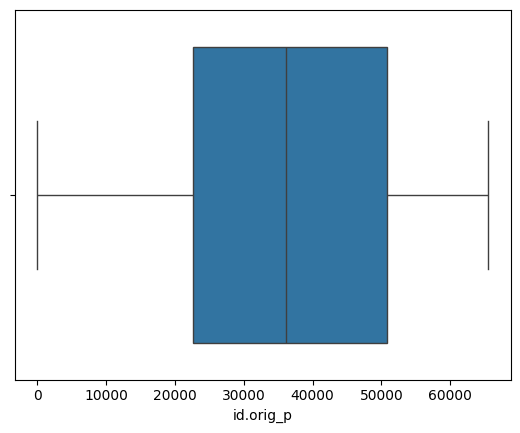

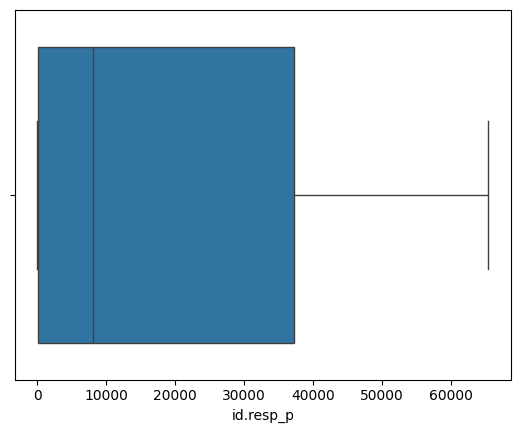

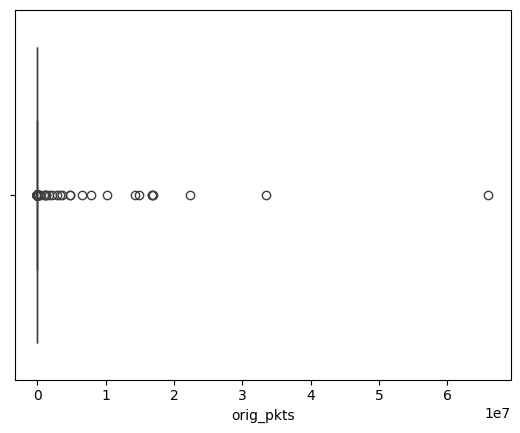

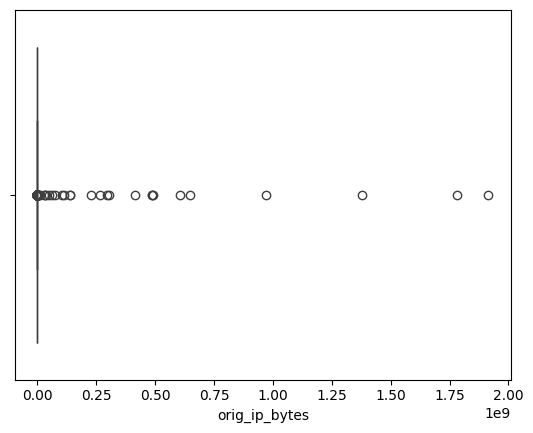

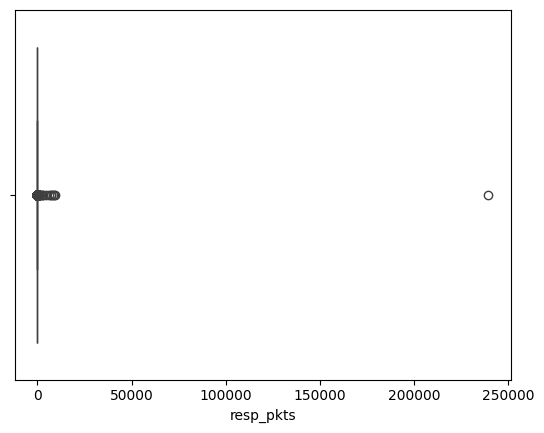

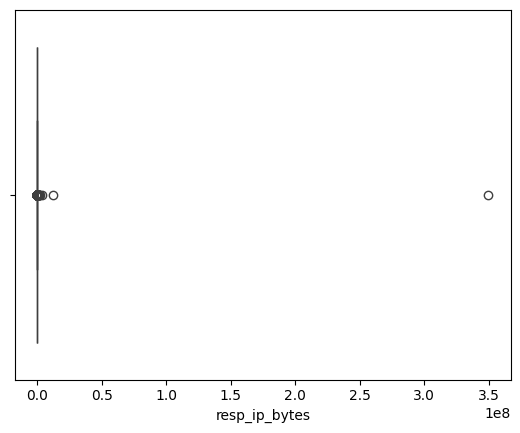

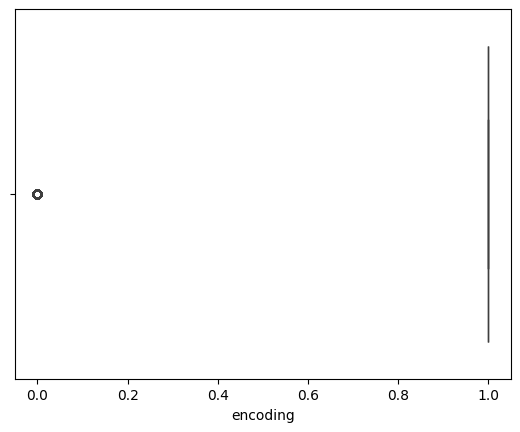

In [112]:
# Boxplot to identify outliers.
import warnings 

warnings.filterwarnings("ignore")
for i in data.select_dtypes(include="number").columns:
    try:
        sns.boxplot(data=data, x=i)
        plt.show()
    except ValueError as e:
        print(f"Error with column {i}: {e}")


In [113]:
#Correlation matrix of the numerical columns
hmp = data.select_dtypes(include="number").corr()
hmp

,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,encoding
id.orig_p,1.000000,-0.361195,0.000797,0.000715,0.000325,0.000306,-0.143108
id.resp_p,-0.361195,1.000000,-0.000767,-0.000711,-0.000475,-0.000368,0.294879
orig_pkts,0.000797,-0.000767,1.000000,0.804118,0.001436,0.001425,0.000192
orig_ip_bytes,0.000715,-0.000711,0.804118,1.000000,0.001946,0.001915,0.000279
resp_pkts,0.000325,-0.000475,0.001436,0.001946,1.000000,0.997350,-0.001350
resp_ip_bytes,0.000306,-0.000368,0.001425,0.001915,0.997350,1.000000,-0.001211
encoding,-0.143108,0.294879,0.000192,0.000279,-0.001350,-0.001211,1.000000


<Axes: >

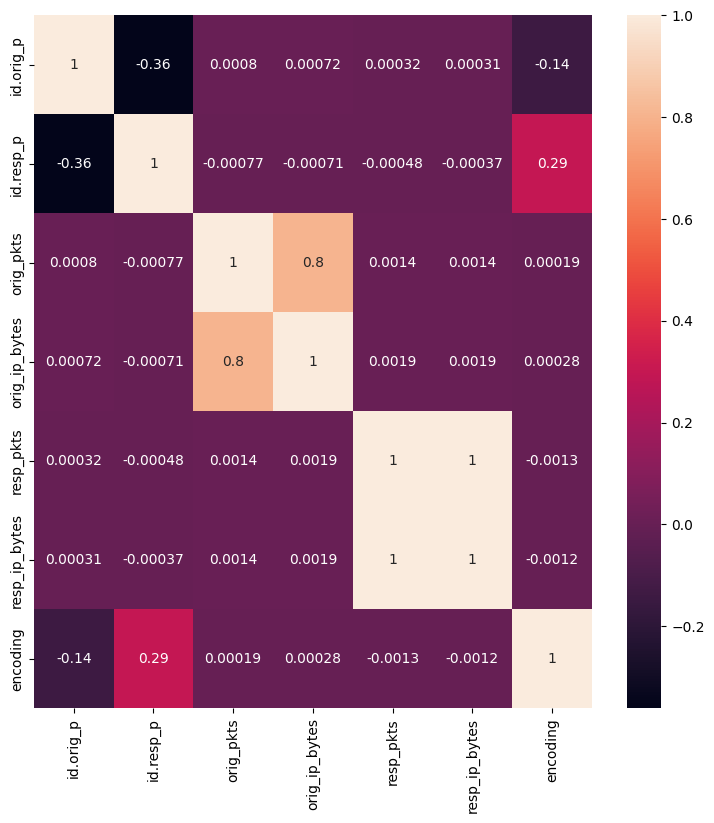

In [114]:
plt.figure(figsize=(9,9))
sns.heatmap(hmp, annot=True)

In [115]:
# Partition the dataset for model training
part, _o = train_test_split(data, test_size=0.4, random_state=42, shuffle=True)

fpath = Path("preprocessed_data", 'model_train.csv')

part.to_csv(fpath, sep=',', index=False)
part.shape

(3627973, 10)